In [423]:
import pandas as pd

In [424]:
df_bookings= pd.read_csv('datasets/fact_bookings.csv')
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


## Data Exploration

In [425]:
df_bookings.shape

(134590, 12)

In [426]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [427]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

<AxesSubplot:>

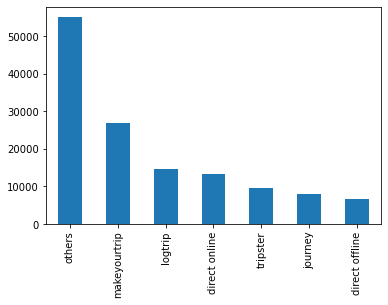

In [428]:
df_bookings.booking_platform.value_counts().plot(kind='bar')

In [429]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [430]:
df_bookings.revenue_generated.min(),df_bookings.revenue_realized.max()

(6500, 45220)

In [431]:
df_date= pd.read_csv('datasets/dim_date.csv')
df_hotels= pd.read_csv('datasets/dim_hotels.csv')
df_aggregated_bookings= pd.read_csv('datasets/fact_aggregated_bookings.csv')
df_rooms= pd.read_csv('datasets/dim_rooms.csv')

## Exploration on Hotels

In [432]:
df_hotels.shape

(25, 4)

In [433]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [434]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

In [435]:
df_hotels.city.value_counts().sort_values()

Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: city, dtype: int64

## Exploration on Aggregated Bookings

In [436]:
df_aggregated_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [437]:
df_aggregated_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [438]:
df_aggregated_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [439]:
df_aggregated_bookings[df_aggregated_bookings.successful_bookings > df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [440]:
df_aggregated_bookings.capacity.max()

50.0

In [441]:
df_aggregated_bookings[df_aggregated_bookings.capacity==df_aggregated_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


## Data Cleaning

In [442]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [443]:
df_bookings[df_bookings.no_guests < 2]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
9,May012216558RT110,16558,28-04-22,1/5/2022,2/5/2022,1.0,RT1,others,4.0,Checked Out,9100,9100
10,May012216558RT111,16558,29-04-22,1/5/2022,7/5/2022,1.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100
13,May012216558RT114,16558,30-04-22,1/5/2022,5/5/2022,1.0,RT1,logtrip,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134582,Jul312217564RT43,17564,31-07-22,31-07-22,3/8/2022,1.0,RT4,others,1.0,Checked Out,32300,32300
134583,Jul312217564RT44,17564,31-07-22,31-07-22,1/8/2022,1.0,RT4,others,NaN,Cancelled,32300,12920
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [444]:
df_bookings= df_bookings[df_bookings.no_guests >2 ]
df_bookings.shape

(30048, 12)

In [445]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(7150, 28560000)

In [446]:
avg,std= df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()
avg,std

(17963.56845713525, 164832.15955707684)

In [447]:
higher_limit = avg + 3*std
higher_limit

512460.0471283657

In [448]:
lower_limit = avg - 3*std
lower_limit

-476532.91021409526

In [449]:
df_bookings[df_bookings.revenue_generated <0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [450]:
df_bookings[df_bookings.revenue_generated > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560


In [451]:
df_bookings=df_bookings[df_bookings.revenue_generated < higher_limit ]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
15,May012216558RT116,16558,27-04-22,1/5/2022,3/5/2022,4.0,RT1,journey,NaN,Checked Out,10920,10920
16,May012216558RT117,16558,29-04-22,1/5/2022,2/5/2022,3.0,RT1,direct offline,NaN,Checked Out,10010,10010
21,May012216558RT24,16558,29-04-22,1/5/2022,3/5/2022,3.0,RT2,others,NaN,Cancelled,13860,5544
24,May012216558RT27,16558,26-04-22,1/5/2022,7/5/2022,3.0,RT2,direct offline,NaN,Cancelled,13860,5544
...,...,...,...,...,...,...,...,...,...,...,...,...
134562,Jul312217564RT213,17564,30-07-22,31-07-22,1/8/2022,4.0,RT2,others,NaN,Cancelled,18360,7344
134570,Jul312217564RT32,17564,31-07-22,31-07-22,3/8/2022,4.0,RT3,journey,NaN,Cancelled,24480,9792
134571,Jul312217564RT33,17564,30-07-22,31-07-22,4/8/2022,3.0,RT3,direct online,NaN,Checked Out,22440,22440
134575,Jul312217564RT37,17564,31-07-22,31-07-22,3/8/2022,6.0,RT3,others,2.0,Checked Out,28560,28560


In [452]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(7150, 45220)

In [453]:
df_bookings.revenue_realized.min(),df_bookings.revenue_realized.max()

(2860, 45220)

In [454]:
mean,std = df_bookings.revenue_realized.mean(),df_bookings.revenue_realized.std()
mean,std

(14496.106399973374, 7985.895193229089)

In [455]:
Higher_limit = mean + 3*std
higher_limit

512460.0471283657

In [456]:
df_bookings[df_bookings.revenue_realized  < higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
15,May012216558RT116,16558,27-04-22,1/5/2022,3/5/2022,4.0,RT1,journey,NaN,Checked Out,10920,10920
16,May012216558RT117,16558,29-04-22,1/5/2022,2/5/2022,3.0,RT1,direct offline,NaN,Checked Out,10010,10010
21,May012216558RT24,16558,29-04-22,1/5/2022,3/5/2022,3.0,RT2,others,NaN,Cancelled,13860,5544
24,May012216558RT27,16558,26-04-22,1/5/2022,7/5/2022,3.0,RT2,direct offline,NaN,Cancelled,13860,5544
...,...,...,...,...,...,...,...,...,...,...,...,...
134562,Jul312217564RT213,17564,30-07-22,31-07-22,1/8/2022,4.0,RT2,others,NaN,Cancelled,18360,7344
134570,Jul312217564RT32,17564,31-07-22,31-07-22,3/8/2022,4.0,RT3,journey,NaN,Cancelled,24480,9792
134571,Jul312217564RT33,17564,30-07-22,31-07-22,4/8/2022,3.0,RT3,direct online,NaN,Checked Out,22440,22440
134575,Jul312217564RT37,17564,31-07-22,31-07-22,3/8/2022,6.0,RT3,others,2.0,Checked Out,28560,28560


## Handling Null Values

In [457]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        17306
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [458]:
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [459]:
df_aggregated_bookings.capacity.fillna(df_aggregated_bookings.capacity.median(),inplace=True)
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [460]:
df_aggregated_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
15,17563,1-May-22,RT1,21,25.0


In [461]:
df_aggregated_bookings.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
6,19558,1-May-22,RT1,25,40.0
7,19560,1-May-22,RT1,23,26.0
8,17561,1-May-22,RT1,22,25.0
9,16560,1-May-22,RT1,24,34.0


In [462]:
df_aggregated_bookings[df_aggregated_bookings.successful_bookings > df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


## Data Transformation

In [463]:
df_aggregated_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


In [464]:
df_aggregated_bookings['occ_per']=df_aggregated_bookings['successful_bookings']/df_aggregated_bookings['capacity']
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_per
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [465]:
df_aggregated_bookings['occ_per']=df_aggregated_bookings['occ_per'].apply(lambda x : x*100 ,2)
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_per
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
3,17558,1-May-22,RT1,30,19.0,157.894737
4,16558,1-May-22,RT1,18,19.0,94.736842
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,50.000000


In [466]:
df_hotels.head(10)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [467]:
df_rooms.head(10)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [468]:
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
15,May012216558RT116,16558,27-04-22,1/5/2022,3/5/2022,4.0,RT1,journey,NaN,Checked Out,10920,10920
16,May012216558RT117,16558,29-04-22,1/5/2022,2/5/2022,3.0,RT1,direct offline,NaN,Checked Out,10010,10010
21,May012216558RT24,16558,29-04-22,1/5/2022,3/5/2022,3.0,RT2,others,NaN,Cancelled,13860,5544


In [469]:
df_room_bookings =pd.merge(df_bookings,df_hotels, on='property_id')
df_room_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
1,May012216558RT116,16558,27-04-22,1/5/2022,3/5/2022,4.0,RT1,journey,NaN,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT117,16558,29-04-22,1/5/2022,2/5/2022,3.0,RT1,direct offline,NaN,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
3,May012216558RT24,16558,29-04-22,1/5/2022,3/5/2022,3.0,RT2,others,NaN,Cancelled,13860,5544,Atliq Grands,Luxury,Delhi
4,May012216558RT27,16558,26-04-22,1/5/2022,7/5/2022,3.0,RT2,direct offline,NaN,Cancelled,13860,5544,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30042,Jul312217564RT213,17564,30-07-22,31-07-22,1/8/2022,4.0,RT2,others,NaN,Cancelled,18360,7344,Atliq Seasons,Business,Mumbai
30043,Jul312217564RT32,17564,31-07-22,31-07-22,3/8/2022,4.0,RT3,journey,NaN,Cancelled,24480,9792,Atliq Seasons,Business,Mumbai
30044,Jul312217564RT33,17564,30-07-22,31-07-22,4/8/2022,3.0,RT3,direct online,NaN,Checked Out,22440,22440,Atliq Seasons,Business,Mumbai
30045,Jul312217564RT37,17564,31-07-22,31-07-22,3/8/2022,6.0,RT3,others,2.0,Checked Out,28560,28560,Atliq Seasons,Business,Mumbai


## Insight Generation

**1. What is an average occupancy rate in each of the room categories?**

In [470]:
df_aggregated_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_per
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
3,17558,1-May-22,RT1,30,19.0,157.894737
4,16558,1-May-22,RT1,18,19.0,94.736842


In [471]:
df_aggregated_bookings.groupby('room_category')['occ_per'].mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_per, dtype: float64

In [472]:
df=pd.merge(df_aggregated_bookings,df_rooms,left_on='room_category',right_on='room_id')
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_per,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.333333,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.333333,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.666667,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.894737,RT1,Standard


In [473]:
df.groupby('room_class')['occ_per'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_per, dtype: float64

In [474]:
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_per,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.333333,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.333333,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.666667,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.894737,RT1,Standard


**2. Print average occupancy rate per city**

In [475]:
df_room_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
1,May012216558RT116,16558,27-04-22,1/5/2022,3/5/2022,4.0,RT1,journey,NaN,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT117,16558,29-04-22,1/5/2022,2/5/2022,3.0,RT1,direct offline,NaN,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
3,May012216558RT24,16558,29-04-22,1/5/2022,3/5/2022,3.0,RT2,others,NaN,Cancelled,13860,5544,Atliq Grands,Luxury,Delhi


In [476]:
df2=pd.merge(df_hotels,df_aggregated_bookings, on ='property_id')
df2.head(4)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_per
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.736842
1,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT2,21,22.0,95.454545
2,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT3,8,8.0,100.000000
3,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT4,3,3.0,100.000000


<AxesSubplot:xlabel='city'>

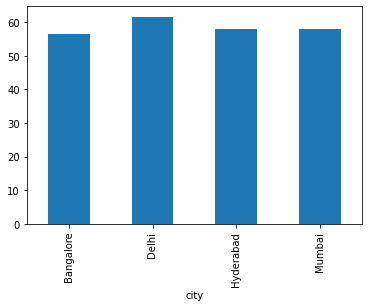

In [477]:
df2.groupby('city')['occ_per'].mean().round(2).plot(kind='bar')

**3. When was the occupancy better? Weekday or Weekend?**

In [478]:
df_date.head(4)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday


In [479]:
df3=pd.merge(df_date,df2,left_on='date',right_on='check_in_date')
df3.head(4)

,date,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_per
0,10-May-22,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.631579
1,10-May-22,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.545455
2,10-May-22,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.000000
3,10-May-22,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT4,2,3.0,66.666667


In [481]:
df3.groupby('day_type')['occ_per'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_per, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [482]:
df3['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [492]:
df3_june=df3[df3['mmm yy']=='Jun 22']
df3_june.head(4)

,date,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_per
2200,10-Jun-22,Jun 22,W 24,weekeday,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT1,11,19.0,57.894737
2201,10-Jun-22,Jun 22,W 24,weekeday,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT2,16,22.0,72.727273
2202,10-Jun-22,Jun 22,W 24,weekeday,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT3,6,8.0,75.000000
2203,10-Jun-22,Jun 22,W 24,weekeday,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT4,3,3.0,100.000000


In [496]:
df3_june.groupby('city')['occ_per'].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_per, dtype: float64

**5: We got new data for the month of august. Append that to existing data**

In [501]:
df_august=pd.read_csv('datasets/new_data_august.csv')
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [503]:
df2.columns

Index(['property_id', 'property_name', 'category', 'city', 'check_in_date',
       'room_category', 'successful_bookings', 'capacity', 'occ_per'],
      dtype='object')

In [505]:
df_august.shape

(7, 13)

In [506]:
df2.shape

(9200, 9)

In [512]:
df_new=pd.concat([df2,df_august],ignore_index=True,axis=0)
df_new.tail(7)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_per,room_class,mmm yy,week no,day_type,occ%
9200,16559,Atliq Exotica,Luxury,Mumbai,01-Aug-22,RT1,30,30.0,NaN,Standard,Aug-22,W 32,weekeday,100.00
9201,19562,Atliq Bay,Luxury,Bangalore,01-Aug-22,RT1,21,30.0,NaN,Standard,Aug-22,W 32,weekeday,70.00
9202,19563,Atliq Palace,Business,Bangalore,01-Aug-22,RT1,23,30.0,NaN,Standard,Aug-22,W 32,weekeday,76.67
9203,19558,Atliq Grands,Luxury,Bangalore,01-Aug-22,RT1,30,40.0,NaN,Standard,Aug-22,W 32,weekeday,75.00
9204,19560,Atliq City,Business,Bangalore,01-Aug-22,RT1,20,26.0,NaN,Standard,Aug-22,W 32,weekeday,76.92
9205,17561,Atliq Blu,Luxury,Mumbai,01-Aug-22,RT1,18,26.0,NaN,Standard,Aug-22,W 32,weekeday,69.23
9206,17564,Atliq Seasons,Business,Mumbai,01-Aug-22,RT1,10,16.0,NaN,Standard,Aug-22,W 32,weekeday,62.50


**6. Print revenue realized per city**

In [515]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [516]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
15,May012216558RT116,16558,27-04-22,1/5/2022,3/5/2022,4.0,RT1,journey,NaN,Checked Out,10920,10920
16,May012216558RT117,16558,29-04-22,1/5/2022,2/5/2022,3.0,RT1,direct offline,NaN,Checked Out,10010,10010


In [518]:
df_bookings_all=pd.merge(df_hotels,df_bookings , on ='property_id')
df_bookings_all.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT116,27-04-22,1/5/2022,3/5/2022,4.0,RT1,journey,NaN,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT117,29-04-22,1/5/2022,2/5/2022,3.0,RT1,direct offline,NaN,Checked Out,10010,10010


In [523]:
df_bookings_all.groupby('city')['revenue_realized'].sum().sort_values(ascending=False)

city
Mumbai       170177191
Bangalore    107537400
Hyderabad     84841010
Delhi         73008908
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [525]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [528]:
pd.merge(df_bookings_all,df_date,left_on='check_in_date',right_on='date')

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type


In [529]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30047 entries, 4 to 134581
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   booking_id         30047 non-null  object 
 1   property_id        30047 non-null  int64  
 2   booking_date       30047 non-null  object 
 3   check_in_date      30047 non-null  object 
 4   checkout_date      30047 non-null  object 
 5   no_guests          30047 non-null  float64
 6   room_category      30047 non-null  object 
 7   booking_platform   30047 non-null  object 
 8   ratings_given      12741 non-null  float64
 9   booking_status     30047 non-null  object 
 10  revenue_generated  30047 non-null  int64  
 11  revenue_realized   30047 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 3.0+ MB


In [530]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [532]:
df_date['date']=pd.to_datetime(df_date['date'])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [534]:
df_bookings_all['check_in_date']=pd.to_datetime(df_bookings_all['check_in_date'])
df_bookings_all.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT116,27-04-22,2022-01-05,3/5/2022,4.0,RT1,journey,NaN,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT117,29-04-22,2022-01-05,2/5/2022,3.0,RT1,direct offline,NaN,Checked Out,10010,10010


In [537]:
df_bookings_all =pd.merge(df_bookings_all,df_date,left_on='check_in_date',right_on='date')
df_bookings_all.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,...,revenue_generated,revenue_realized,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
0,16558,Atliq Grands,Luxury,Delhi,May052216558RT11,15-04-22,2022-05-05,7/5/2022,3.0,RT1,...,10010,10010,2022-05-05,May 22,W 19,weekeday,2022-05-05,May 22,W 19,weekeday
1,16558,Atliq Grands,Luxury,Delhi,May052216558RT13,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,...,10010,10010,2022-05-05,May 22,W 19,weekeday,2022-05-05,May 22,W 19,weekeday
2,16558,Atliq Grands,Luxury,Delhi,May052216558RT15,30-04-22,2022-05-05,10/5/2022,4.0,RT1,...,10920,10920,2022-05-05,May 22,W 19,weekeday,2022-05-05,May 22,W 19,weekeday


In [542]:
df_bookings_all.groupby('mmm yy_x')['revenue_realized'].sum().sort_values(ascending=False)

mmm yy_x
May 22    103788971
Jul 22     99394082
Jun 22     97631179
Name: revenue_realized, dtype: int64

**8.Print revenue realized per hotel type**

In [545]:
df_bookings_all.groupby('property_name')['revenue_realized'].sum().sort_values

<bound method Series.sort_values of property_name
Atliq Bay        53285951
Atliq Blu        53066154
Atliq City       38094663
Atliq Exotica    64876571
Atliq Grands     42582541
Atliq Palace     39414345
Atliq Seasons     9494007
Name: revenue_realized, dtype: int64>

**9.Print average rating per city**

In [546]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.36
Delhi        3.75
Hyderabad    3.66
Mumbai       3.70
Name: ratings_given, dtype: float64

**10. Print a pie chart of revenue realized per booking platform**

<AxesSubplot:ylabel='revenue_realized'>

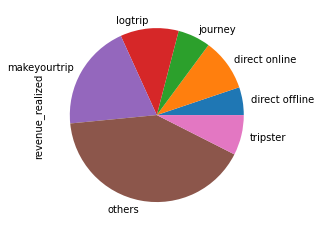

In [547]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")